<a href="https://colab.research.google.com/github/Karthikeya-S/ZOMATO-STOCK-PREDICTION/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#importing necessary libraries and dataset which we stored as csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline
train_data = pd.read_csv('/content/price-history (1).csv')

In [63]:
#Testing the imported dataset by printing the head(First 5 rows) and tails(Last 5 rows) of the dataset

train_data.head()
train_data.tail()

,DATE,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES
261,29-07-2021,134.70,144.00,132.2,141.70,11900735,128506
262,28-07-2021,132.30,134.90,123.6,131.60,8306124,68382
263,27-07-2021,141.55,147.80,127.8,132.60,19253999,191820
264,26-07-2021,126.00,143.75,125.5,140.85,12001508,120176
265,23-07-2021,115.00,138.00,114.0,125.85,45171382,286344


In [64]:
#Getting informations about the columns

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           266 non-null    object 
 1   OPEN           266 non-null    float64
 2   HIGH           266 non-null    float64
 3   LOW            266 non-null    float64
 4   CLOSE          266 non-null    float64
 5   NO. OF SHARES  266 non-null    int64  
 6   NO. OF TRADES  266 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 14.7+ KB


In [66]:
#Since DATE column has datatype object, we should convert it to datetime datatype for easy evaluation

train_data['DATE'] = pd.to_datetime(train_data['DATE'])
train_data.set_index('DATE', inplace=True)
train_data.head()

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES
DATE,,,,,,
2022-08-22,61.00,62.80,59.35,61.90,10856430,26252
2022-08-19,67.15,68.25,60.30,61.40,13446843,33601
2022-08-17,64.55,65.60,61.65,65.30,18753833,52805
2022-08-16,62.50,67.35,62.50,64.25,14346075,42503
2022-12-08,58.20,63.00,57.90,61.75,24272027,54685


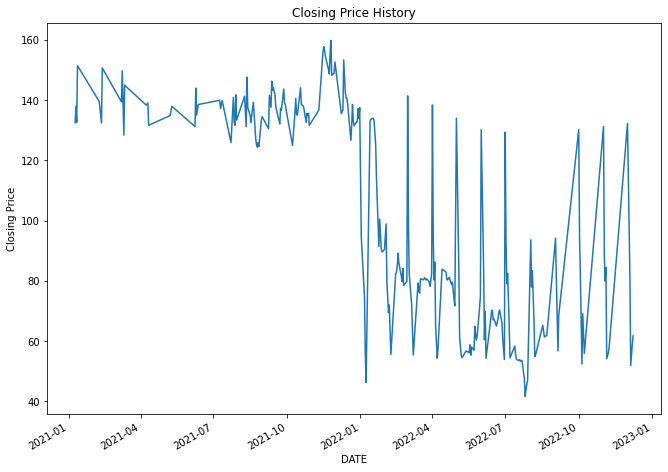

In [67]:
#Let's plot the graph with the close value in it.

plt.figure(figsize=(11, 8)) # resizing the plot
train_data['CLOSE'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('DATE') # x label
plt.ylabel('Closing Price') # y label
plt.show()

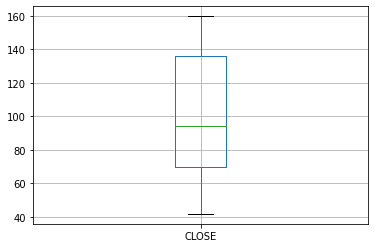

In [68]:
#BOX PLOT

train_data.boxplot(column=['CLOSE'])

<Figure size 1152x576 with 0 Axes>

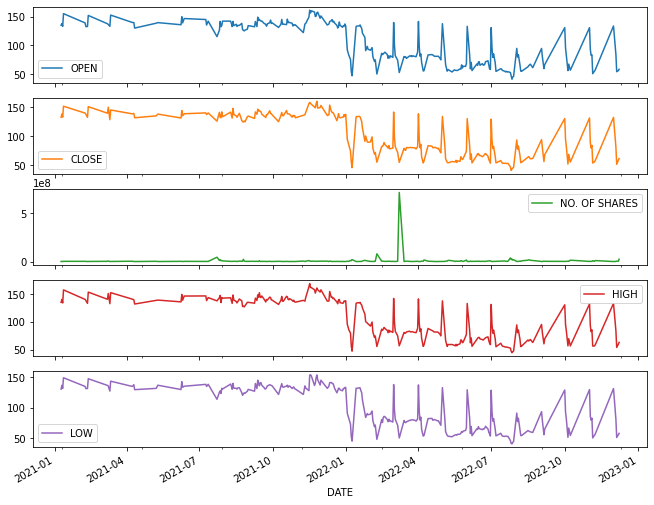

In [69]:
#Visualising other columns in the dataset

plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['OPEN', 'CLOSE', 'NO. OF SHARES', 'HIGH', 'LOW']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [70]:
#We have to add some features to the dataset. HL_PCT calculates for the high-low percentage for each day 
# and the PCT_change calculatesfor the open-close percentage for each day.

train_data['HL_PCT'] = (train_data['HIGH'] - train_data['LOW']) / train_data['LOW'] * 100.0
train_data['PCT_change'] = (train_data['CLOSE'] - train_data['OPEN']) / train_data['OPEN'] * 100.0

In [71]:
#Checking for null values in the dataset

train_data.isnull().sum()

OPEN             0
HIGH             0
LOW              0
CLOSE            0
NO. OF SHARES    0
NO. OF TRADES    0
HL_PCT           0
PCT_change       0
dtype: int64

In [72]:
#We are going to drop a few columns in the dataset

df = train_data[['HL_PCT', 'PCT_change', 'CLOSE','NO. OF SHARES']]

In [73]:
#Since we want to forecast the stock prices for days and months to come, 
#we are going to shift the Adj. Close column to create room for the predictions of the days to come.

forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['CLOSE'].shift(-forecast_out)

14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
#For model buildings, let's import all the libraries

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [75]:
#Scaling the data

scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [76]:
#Picking the data to be predicted

X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [77]:
#Getting the target values

df.dropna(inplace=True)
y = np.array(df['label'])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [78]:
#Let's train the model with 80% of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#LINEAR REGRESSION

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [81]:
#RANDOM FOREST

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [82]:
#RIDGE

rg = Ridge()
rg.fit(X_train, y_train)
rg_confidence = rg.score(X_test, y_test)

In [83]:
#SVR

svr = SVR()
svr.fit(X_train, y_train)
svr_confidence = svr.score(X_test, y_test)

In [84]:
#Now that we have calculated the accuracy for 4 different models, let’s visualise which models have the best accuracy.

names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.733794
1,Random Forest,0.972346
2,Ridge,0.789923
3,SVR,0.761092


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

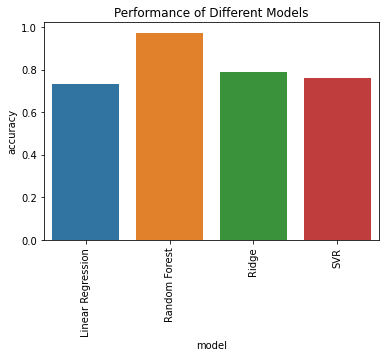

In [85]:
sns.barplot(data = alg_vs_score, x='model', y='accuracy' )
plt.title('Performance of Different Models')
plt.xticks(rotation='vertical')

The barplot shows that the RandomForestRegressor has the highest accuracy. Therefore, we would be using the model to predict our X_predict data.

In [129]:
#Adding the predicted data to the dataset
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


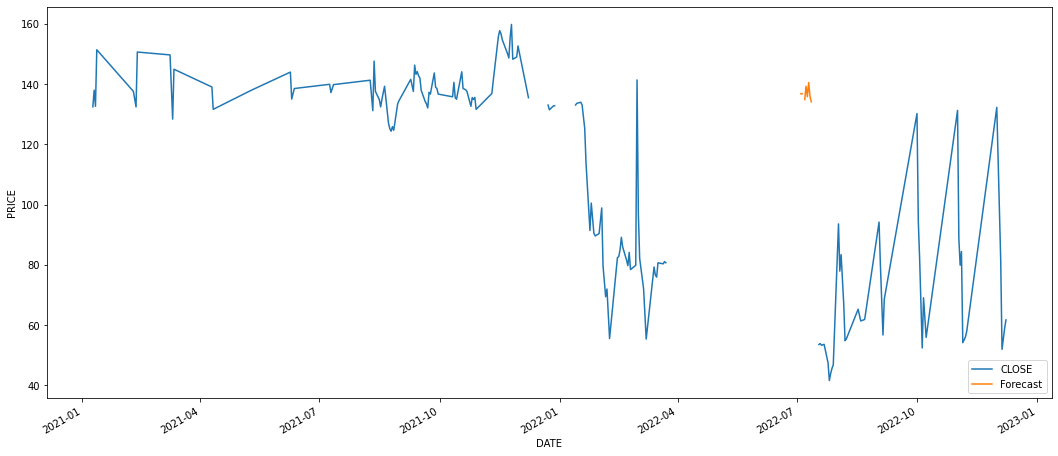

In [130]:
#Visualizing CLOSE and the Forecast data
plt.figure(figsize=(18, 8))
df['CLOSE'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.show()

THIS IS MY PREDICTED VALUE FOR THE ZOMATO STOCK PRICE FOR THE NEXT 7 DAYS.